<div style="background-color: #ffffff ; padding: 10px;">

**Goals**:
1. Retrieve the past year's sales for one NFT collection through an API call.
2. Save output as CSV file.

**Data:** [OpenSea NFT Marketplace](https://opensea.io/collection/apparitions-by-aaron-penne/activity)

**Skills**: API integration, date and time handling, pagination, loops

**Technology**: Python, datetime, Requests, Pandas

**Results**: [apparitions-by-aaron-penne_collection_events.csv](./apparitions-by-aaron-penne_collection_events.csv)
</div>

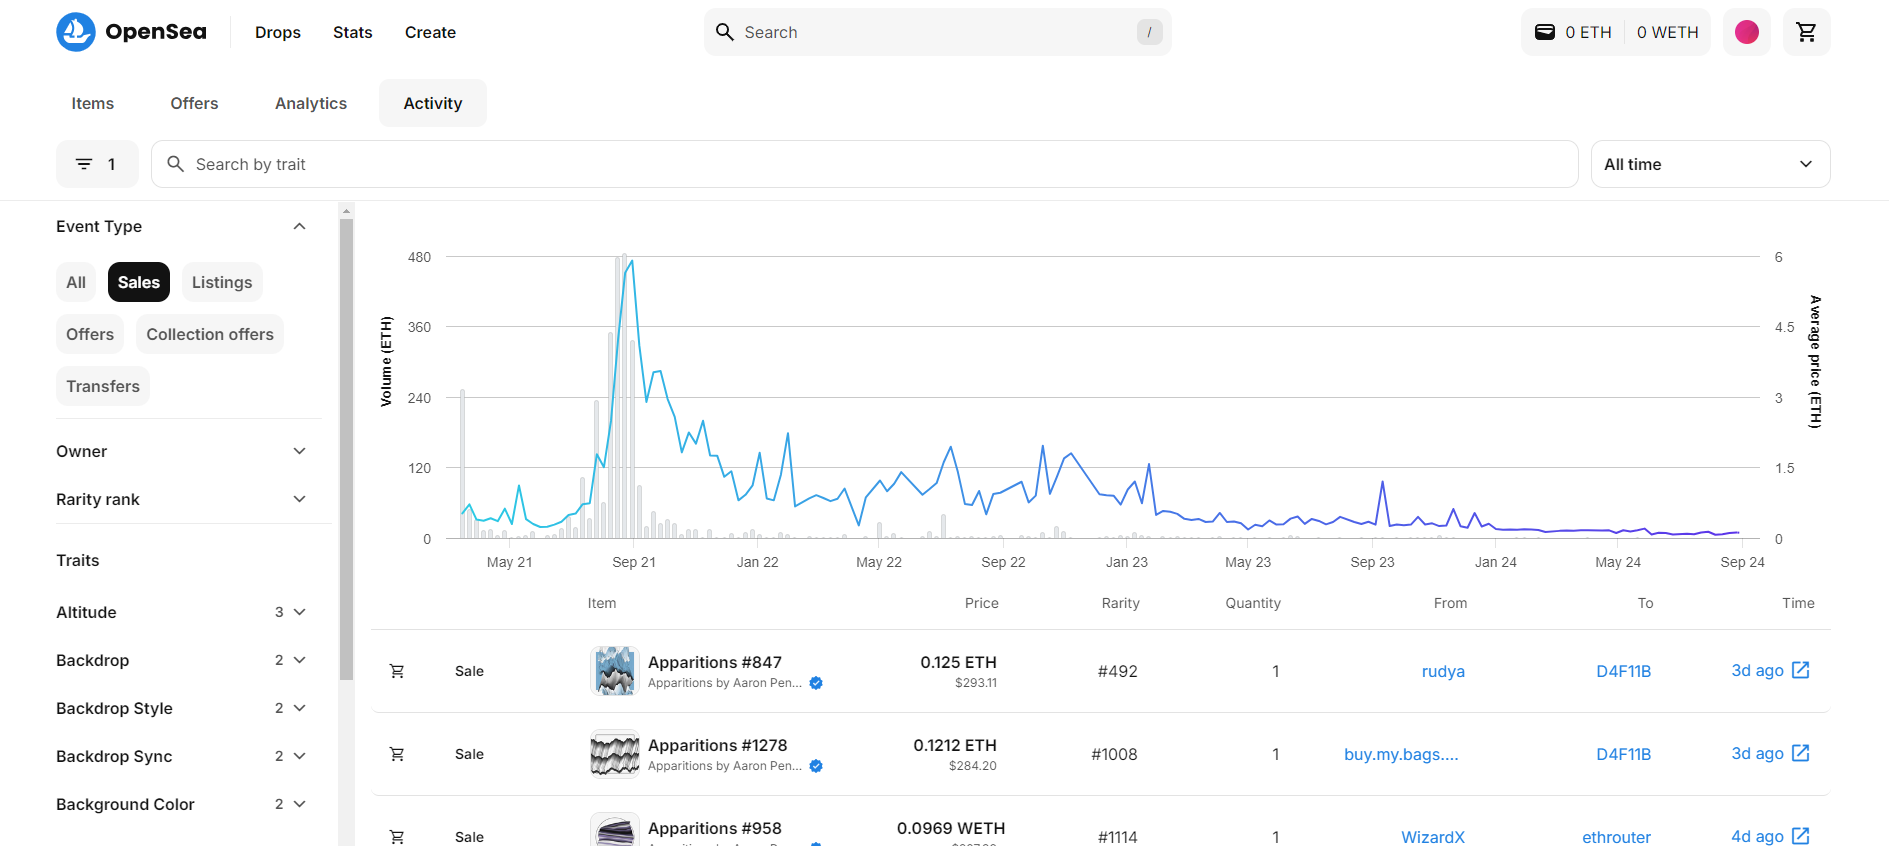

In [17]:
# imports
import pandas as pd
import datetime
# this module handles leap years with time delta
from dateutil.relativedelta import relativedelta

import requests

import os
from dotenv import load_dotenv

API Key: https://opensea.io/account/settings?tab=developer

In [18]:
# load API key
load_dotenv()
opensea_api_key = os.getenv("OPENSEA_API_KEY")

API call

In [19]:
# input collection name
collection = "apparitions-by-aaron-penne"

# set today's date
today = datetime.datetime.now()

# set number of days in past
#past_date = today - datetime.timedelta(days=365)

# set one year in past
past_date = today - relativedelta(years=1)

# convert to unix (starting 1970!)
unix_past_date = int(past_date.timestamp())

# create blank df to store page data
events_df = pd.DataFrame()

# initialize next_event variable
next_event = None

# PAGINATION
while True:
    url = f"https://api.opensea.io/api/v2/events/collection/{collection}?after={unix_past_date}&event_type=sale"
    if next_event:
        # This adds the next event value (and required syntax) to the URL string
        url += f"&next={next_event}"

    headers = {
        "accept": "application/json",
        "x-api-key": opensea_api_key
    }

    response = requests.get(url, headers=headers)

    # formatting as json
    events_json = response.json()

    # get the "asset events"
    events_data = events_json.get("asset_events", [])
    
    # store to df (not main - temp)
    page_events_df = pd.json_normalize(events_data)
    
    # concatenate page_events (temp) to events_df (master)
    events_df = pd.concat([events_df, page_events_df], ignore_index=True)
    
    # update next_event for pagination
    next_event = events_json.get("next")

    # if there are no more pages, exit the loop
    if not next_event:
        break

# preview
events_df

,event_type,order_hash,chain,protocol_address,closing_date,quantity,seller,buyer,transaction,event_timestamp,...,nft.display_animation_url,nft.metadata_url,nft.opensea_url,nft.updated_at,nft.is_disabled,nft.is_nsfw,payment.quantity,payment.token_address,payment.decimals,payment.symbol
0,sale,0xe5f49c2739e33f04ea6938ace0a9a2e8653dec6597af...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725687191,1,0x3612b2e93b49f6c797066ca8c38b7f522b32c7cb,0xd4f11b5f55c20fc71c4d533d1d4c1106747a9772,0x73cce3e527a2138f56ae7c92f493164da0859f70fce7...,1725687191,...,None,https://api.artblocks.io/token/28000847,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2024-09-07T05:34:05.878915,False,False,125000000000000000,0x0000000000000000000000000000000000000000,18,ETH
1,sale,0x5a1edeedd112ef6afe84ec38592869c4f6f442111e26...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725687191,1,0xc504cc5e7aa0ff1a244a5d09deb528765de7ed59,0xd4f11b5f55c20fc71c4d533d1d4c1106747a9772,0x73cce3e527a2138f56ae7c92f493164da0859f70fce7...,1725687191,...,None,https://api.artblocks.io/token/28001278,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2024-09-07T05:34:06.169040,False,False,121200000000000000,0x0000000000000000000000000000000000000000,18,ETH
2,sale,0x53e2532b1b0eccb45836897cd1467c9ee74c6c1982b4...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725581363,1,0x44e9d011df8741be2493e99297e9ad67bb1aa85b,0xf1b30855994a95e7e2024aa44d986dc20fa6f617,0xa9ac0c7e51dacb4f2bce3e889372f952705983d108bf...,1725581363,...,None,https://api.artblocks.io/token/28000958,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2024-09-06T00:34:36.983003,False,False,96900000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,WETH
3,sale,0x929f5318868634b449a52a31633e98289f2569a07f62...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725511451,1,0x57227fe96ded3ef450033de63eafb4550985cd83,0xf1b30855994a95e7e2024aa44d986dc20fa6f617,0x45c20a1c3ff8471aa309da9da3e7f6be003478f769e3...,1725511451,...,None,https://api.artblocks.io/token/28000070,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2024-09-05T05:04:17.847345,False,False,88800000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,WETH
4,sale,0x845ca75ed4c3bef65986b9fc29e2a0e9bb493612c7ed...,ethereum,0x0000000000000068f116a894984e2db1123eb395,1725399239,1,0xc4bafdc0a6b7c1339055cea9dfd433b28815ae78,0x57227fe96ded3ef450033de63eafb4550985cd83,0x1dda52983d10883473aaeb3c6933bddda2985e29f314...,1725399239,...,None,https://api.artblocks.io/token/28000070,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2024-09-05T05:04:17.847345,False,False,65900000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,sale,0xebd026413ebadfd2bbc0710cbdb7612a3b3625e6d302...,ethereum,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,1695750131,1,0x456a48b9060ac9d955a648516fd4bb8d48042f5a,0xdb392d0f40019292f8dd055691d1390b7f1e06fa,0x015517368608d923e8a64a2068fe13ef5253332de9b4...,1695750131,...,None,https://api.artblocks.io/token/28000068,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2023-09-26T17:55:02.513475,False,False,280000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,WETH
170,sale,0x62178d0eaf395a8c235952e6425323c6e69be0a22ea3...,ethereum,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,1695673367,1,0x6974f1d51758fc98449f18c7951f1f5bba170cbc,0x3b7f246d8340de4fe0495bfd243fbea798503c7f,0x155e4d636e68007233e13d6b1f830330f244c2038aff...,1695673367,...,None,https://api.artblocks.io/token/28001009,https://opensea.io/assets/ethereum/0xa7d8d9ef8...,2023-09-25T20:35:51.643951,False,False,330000000000000000,0x0000000000000000000000000000000000000000,18,ETH
171,sale,0x34d86123a366f50c24bb10ba57c34865609a6aaeef3f...,ethereum,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,1695619715,1,0x4a98b7ecb596e5c03b51aea82b1d1769c5d73c18,0xa200d3bb2655914e8693b2a92c55c49abdb10e41,0x47b5e2da0e110ad3ef6178beeb535b352f027fc61840...,1695619715,...,None,https://a

save transactions to CSV

In [20]:
# create CSV name
csv_name = f"{collection}_collection_events.csv"

# write df to csv
events_df.to_csv(csv_name)